<div style="text-align: center; color:#FFF800">
    <h1><b>Assignment 3 - Clustering</b></h1>
    <h3>Artificial Intelligence - Spring 2024</h3></div>
<p style="text-align: center;text-decoration: underline">Alireza Hosseini</p>
<p style="text-align: center;text-decoration: underline">SID : 810100125</p>


<h2 style=color:#63B8FF><strong>Introduction</strong></h2>
This notebook's purpose is analysis of a Dataset (containing picture of different flowers) and classifying them using Clustering alogirthms, with the help of pre-trained VGG16 CNN model and comparing the results with the real/pre-defined lables (available in the dataset)

In [1]:
# Loading/Processing the images  
from keras.preprocessing.image import load_img 
from keras.applications.vgg16 import preprocess_input 

# Pre-trained Model
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# Clustering and Dimension reduction
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Evaluation of Clustering
from sklearn.metrics import homogeneity_score
from sklearn.metrics import silhouette_score

# General libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset_path = "./flower_images"
correct_labels_path = "./flower_images/flower_labels.csv"


def cluster_plot(data, title, labels, cluster_centers=None, highlight_centers=False):
    plt.figure(figsize=(14, 8))
    for cluster in np.unique(list(labels)):
        cluster_group = (labels == cluster)
        if(cluster == -1):
            plt.scatter(data[cluster_group, 0], data[cluster_group, 1], label=f"Outliers", marker="x", c="black", s=30, alpha=1)
        else :
            plt.scatter(data[cluster_group, 0], data[cluster_group, 1], label=f"Cluster Number {cluster}")

    if(highlight_centers):
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], label=f"Centroids", marker='*', c='black', s=30, alpha=0.8)
    plt.legend()
    plt.grid()
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.title(f'{title} Clustering')
    plt.show()

2024-04-22 02:12:06.290863: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 02:12:06.356802: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 02:12:06.579280: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 02:12:07.551526: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<h3 style=color:green><strong>Pre-Processing and Feature Extraction</strong></h3>


In [2]:
def extract_features(image_path, model):
    image = load_img(image_path, target_size=(224, 224))
    image_array = np.array(image)
    reshaped_image = image_array.reshape(1, 224, 224, 3)
    image_input = preprocess_input(reshaped_image)
    return model.predict(image_input)

In [3]:
pretrained_model = VGG16()
pretrained_model = Model(inputs = pretrained_model.inputs, outputs = pretrained_model.layers[-2].output)

feature_vector = dict()

for file in os.listdir(dataset_path):
    if(file.endswith(".png")):
        feature_vector[int(file[0:4])] = extract_features(os.path.join(dataset_path, file), pretrained_model)
feature_vector = dict(sorted(feature_vector.items()))

filenames = np.array(list(feature_vector.keys()))

feature_vector = np.array(list(feature_vector.values()))

feature_vector = feature_vector.squeeze(axis=1)
print(feature_vector.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

- __*1. Why feature extraction? Why don't we just read the pixels?*__
    - __Dimensionality :__ Images (especially high-res images) typically have high-dimensional pixel represntations. Extracting Features allows us to reduce the dimensionality, making clustering computationally feasible.
    - __Relevant information :__ Raw pixels include many details such as background noise or camera artifacts. Feature extraction aims to focus on the main characteristics such as shapes, colors and edges.
    - __Patterns :__ Features extracted from images may include higher-level information or patterns that allow us to group them based on the content on the whole image, rather than raw pixel values.
- __*2. What are the 3 techniques of feature extraction in image processing?*__
    - __Transform-based Methods :__ Transform the image to a different domain (ex. Frequency via Fourier Transform) to highlight specific features.
    - __Edge detection :__ Identify massive changes in pixel intensity which normally corresponds to object bounderies or important image features.
    - __Histogram-based Methods :__ Analysis based on distribution of pixel intensities in the image. Usually gray-scale histograms, color histograms, etc.
- __*3. What is the preprocessing needed to be done on the image in order for it to be ready to enter the model ?*__
    - __Resizing :__ Resize the input image to the dimensions required by the model. __For VGG16__, the typical input size is 224 * 224
    - __Normalization :__ Normalize the pixel values of the resized image to have zero mean and unit variance. This helps in stabilizing the training process and improving convergence. 
    - __Channel Order Conversion :__ The `preprocess_input` function (imported from keras) that we have used converts the image data from RGB (Red, Green, Blue) format to BGR (Blue, Green, Red) format, which is the format __VGG16__ was trained on.
    - __Zero-Centering :__ `preprocess_input` also subtracts the mean RGB values (calculated from the dataset) from each color channel in the image. This helps us to center the data around zero, improving the training process.

<h3 style=color:orange><strong>Loading Correct Labels</strong></h3>


In [4]:
correct_labels = pd.read_csv(correct_labels_path)['label'].to_dict()
#unique_labels = list(set(correct_labels))
#print(unique_labels)


<h3 style=color:red><strong>Clustering Implementation</strong></h3>

<h4 style=color:red><strong>Using K-Means algorithm</strong></h4>

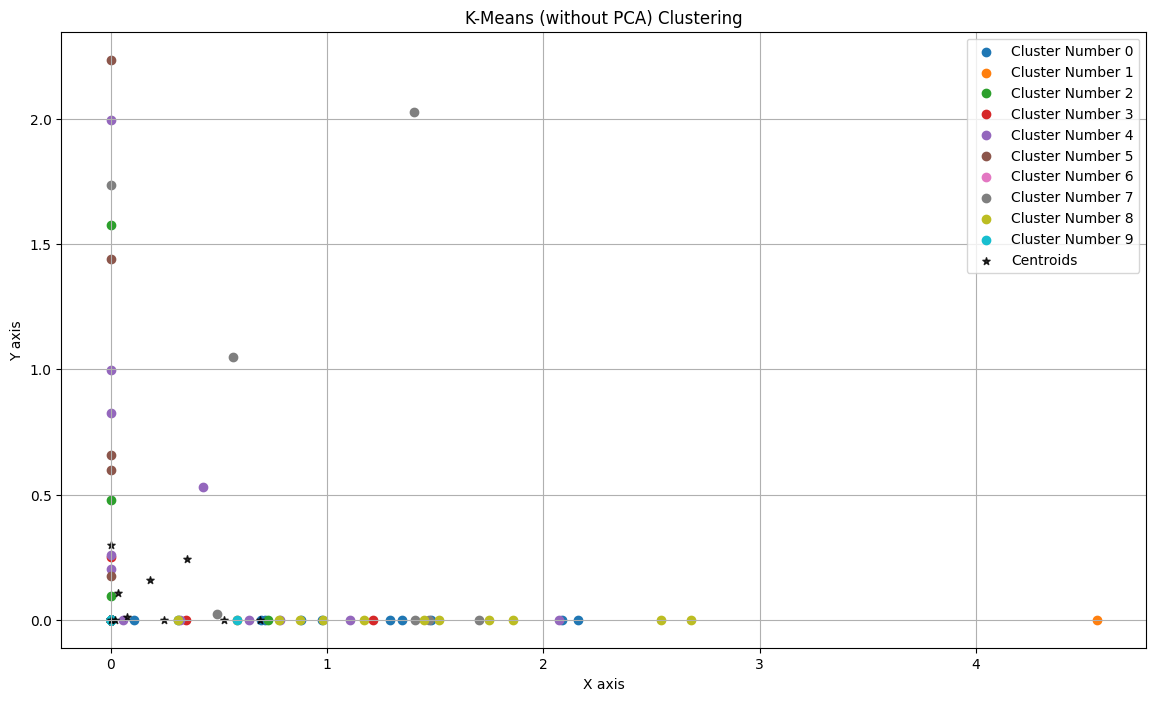

In [5]:

kmeans = KMeans(n_clusters=len(np.unique(list(correct_labels.values()))), init="random", n_init='auto', random_state=75)
kmeans.fit(feature_vector)
kmeans_output = kmeans.predict(feature_vector)


# Plot without Dimension Reduction
cluster_plot(feature_vector, "K-Means (without PCA)", kmeans_output, kmeans.cluster_centers_, highlight_centers=True)

<h4 style=color:red><strong>Using DBSCAN algorithm</strong></h4>

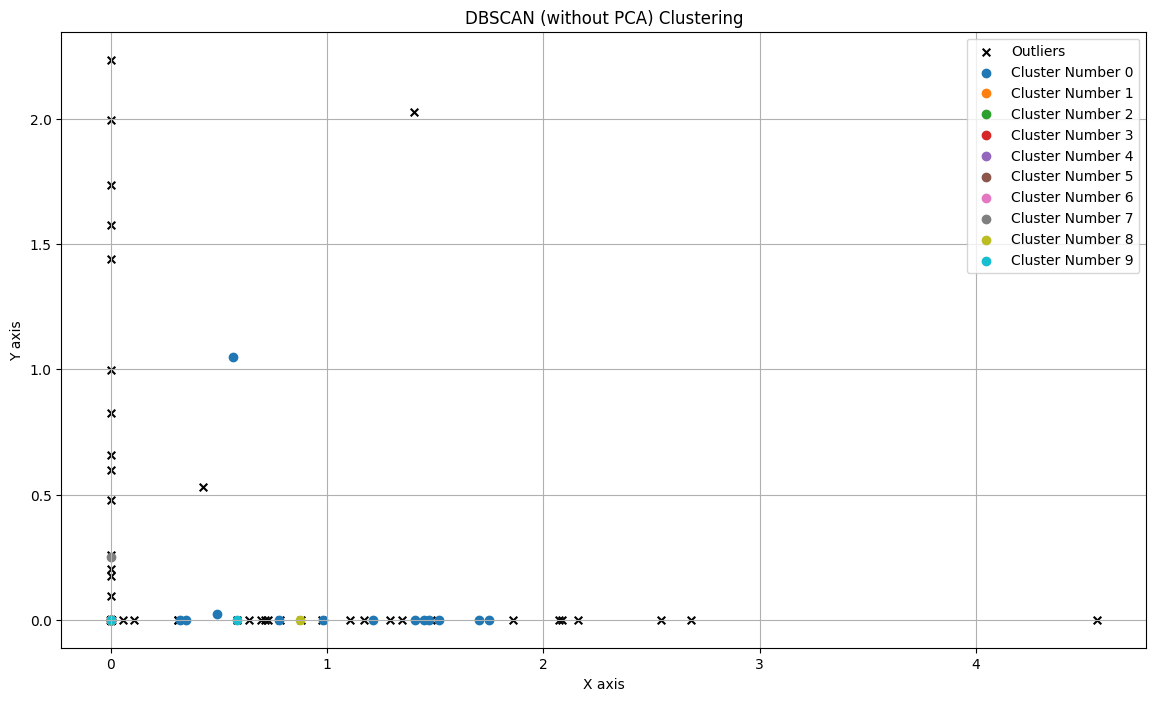

In [47]:
dbscan = DBSCAN(eps=48, min_samples=2)
dbscan.fit(feature_vector)
dbscan_output = dbscan.fit_predict(feature_vector)


cluster_plot(feature_vector, "DBSCAN (without PCA)", dbscan_output)

<h3 style=color:yellow><strong>Clustering Methods</strong></h3>


##### K-Means :
- It's a popular algorithm for grouping similar data points together. Here is how it works :
    1. Choose the number of clusters (k)
    2. The algorithm __randomly__ selects k data points as initial representatives for the clusters. These are called centroids. Think of them as the center points of each group.
    3. Each data point in dataset is assigned to the closest centroid based on a __distance__ metric (usually Euclidean distance). 
        - -> that's why It's important to make sure our dataset can be shown in eucldiean space.
    4. After all the data points are assigned, the centroids are __updated__. The new centroid for each cluster becomes the __average__ of all the data points assigned to that cluster.
    5. Repeat steps 3 and 4 until the centroid no longer change (significantly) or for a predefined number of iterations.
- Important Notes :
    - Choosing the right value for k is crucial. There are techniques like the __elbow method__ to help determine the optimal number of clusters for your data.
    - K-means is sensitive to __outliers__ in the data, which can distort the centroids and lead to __uneven clusters__.

##### DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
- Core concept: Density
    1. DBSCAN starts by randomly picking a data point from the dataset.
    2. It then checks the point's neighborhood defined by the __ε (epsilon) radius__ :
        1. If the neighborhood has at least minPts, the point is classified as a core point, indicating a dense region.
        2. If the neighborhood has less than minPts, but it's close to a core point, It's classified as a border point (probably on the cluster's edge)
        3. If the neighborhood has less than minPts points and no nearby core points, it's classified as noise
    3. If the chosen point is a core point, DBSCAN expands the cluster by considering its core neighbors and their neighbors __recursively__. This continues until there are no more core points in the region. (__border points__ along the way may be included if they are reachable from core points within the __ε distance__.)
    4. Repeat steps 1-3 for all unvisited points
- Important Notes :
    - Choosing the right values for ε and minPts impacts the clustering results.
    - DBSCAN may not be ideal for high dimensional datasets.

##### K-Means vs. DBSCAN
- __Predefined Number of Clusters :__ K-Means needs to be given the number of clusters beforehand. DBSCAN discovers the number based on the data density.
- __Cluster Shapes :__ K-Means works better with circular clusters. DBSCAN is more flexible and can identify clusters of irregular shapes.
- __Outliers :__ While in K-Means centroids can get distorted by outliers and lead to uneven clusters, DBSCAN is more robust to outliers and can allow for some noise.
- __Speed :__ K-means is generally faster and more efficient for large datasets, especially for lower dimensional data.


##### How did we find the optimal (K) for K-Means method?
- __Domain Knowledge__ -> In some cases __(such as this one)__ we have some prior knowledge about the expected number of clusters
- __Elbow Method__ -> Calculating Sum of Squared error within clusters for different values of K, then look for an elbow shape in the plot (which is when __WSS__ starts to decrease slowly) that K is the optimal K.
- __Silhouette Analysis__ -> Simply calculate __Silhouette Coefficient__ for different values of K and choose the K with the highest silhouette coefficient.
    - *(This solution is covered in the section at the end of the notebook after the explaination for Silhouette is given)*

##### **Cluster outputs Comparison** :
- We can clearly see that __DBSCAN__ has failed to classify our data while __K-Means__ has given us an answer good enough in some degress.
- After the Dimensionality Reduction (Covered in the next section) We can see much more improvement made (especially for DBSCAN) in terms of clustering.
- We will also compare the two __statistically__ in the last section of this notebook __(Evaluation and Analysis)__

<h3 style=color:red><strong>Dimensionality Reduction</strong></h3>

##### What is PCA and How does it work?
- Principal Component Analysis __(PCA)__ is a technique used to reduce the number of variables in a large dataset while keeping most of the important information. It's particularly useful for simplifying data for __visualization__ and in __machine learning__ tasks.
- Key points and Concepts of PCA :
    - PCA reduces the `number of dimensions` __(features)__ in our data.
    - Making new variables (usually called `Principal Components`) capturing the most variance in the features.
    - PCA prioritizes features with the __most spread__ (also called `Variance`) which refers to spread of data points around the mean for a specific feature. 
- Applications of PCA :
    - __Visualization :__ Allows for high-dimensional data to be shown in lower dimensions (3D data on a 2D plane)
    - __Machine Learning :__ Improve the performance of machine learning algorithms by reducing computational complexity and potential overfitting 
    - __Feature Selection :__ Identify the most important features in our data and guiding for better analysis.
- *Cautions* :
    - PCA assumes a linear relationship between features.
    - PCA obviously removes part of the data to reduce the dimension, It's always a trade-off between the number of component of the feature and the amount of information kept.

<h4 style=color:red><strong>Using K-Means algorithm (with PCA)</strong></h4>

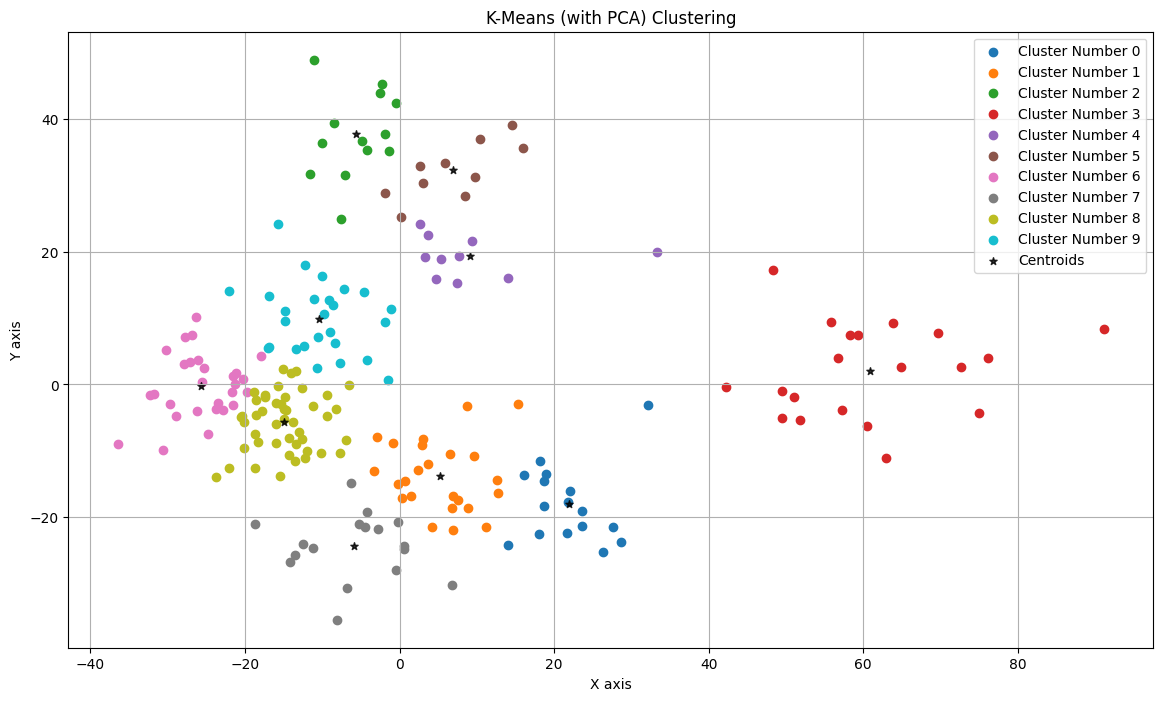

Number of Items with label 0 -> 16
Number of Items with label 1 -> 24
Number of Items with label 2 -> 13
Number of Items with label 3 -> 20
Number of Items with label 4 -> 10
Number of Items with label 5 -> 10
Number of Items with label 6 -> 28
Number of Items with label 7 -> 17
Number of Items with label 8 -> 46
Number of Items with label 9 -> 26


In [7]:
pca = PCA(n_components=2)
X = pca.fit_transform(feature_vector)


kmeans_PCA = KMeans(n_clusters=len(np.unique(list(correct_labels.values()))), init="random", n_init='auto', random_state=75)
kmeans_PCA.fit(X)
kmeans_PCA_output = kmeans_PCA.predict(X)


# Plot without Dimension Reduction
cluster_plot(X, "K-Means (with PCA)", kmeans_PCA_output, kmeans_PCA.cluster_centers_, highlight_centers=True)
for i in np.unique(kmeans_PCA_output):
    print(f"Number of Items with label {i} -> {(np.array(kmeans_PCA_output) == i).sum()}")

<h4 style=color:red><strong>Using DBSCAN algorithm (with PCA)</strong></h4>

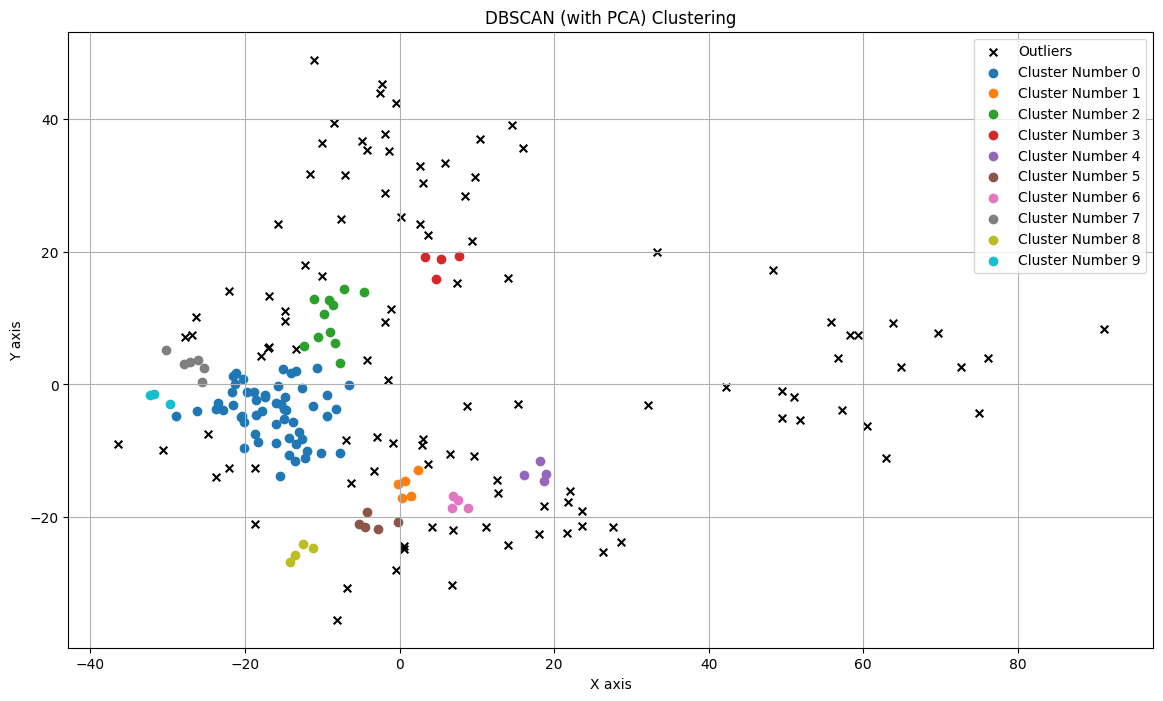

Number of Outliers : 109
Number of Items with label 0 -> 55
Number of Items with label 1 -> 5
Number of Items with label 2 -> 11
Number of Items with label 3 -> 4
Number of Items with label 4 -> 4
Number of Items with label 5 -> 5
Number of Items with label 6 -> 4
Number of Items with label 7 -> 6
Number of Items with label 8 -> 4
Number of Items with label 9 -> 3


In [15]:
pca = PCA(n_components=2)
X = pca.fit_transform(feature_vector)

dbscan_PCA = DBSCAN(eps=3.2, min_samples=4)
dbscan_PCA.fit(X)
dbscan_PCA_output = dbscan_PCA.fit_predict(X)

cluster_plot(X, "DBSCAN (with PCA)", dbscan_PCA_output)
for i in np.unique(dbscan_PCA.labels_):
    if(i == -1):
        print(f"Number of Outliers : {(np.array(dbscan_PCA.labels_) == i).sum()}")
    else :
        print(f"Number of Items with label {i} -> {(np.array(dbscan_PCA.labels_) == i).sum()}")

<h3 style=color:purple> <strong>Evaluation & Analysis</strong></h3>


In [16]:
print(f"Clustering Algorithm : K-Means (without PCA)")
print(f"Homogeneity Score {homogeneity_score(list(correct_labels.values()), kmeans_output)}")
print(f"Silhouette Score {silhouette_score(feature_vector, kmeans_output)}")
print("_______________________________")
print(f"Clustering Algorithm : K-Means (with PCA)")
print(f"Homogeneity Score {homogeneity_score(list(correct_labels.values()), kmeans_PCA_output)}")
print(f"Silhouette Score {silhouette_score(X, kmeans_PCA_output)}")


Clustering Algorithm : K-Means (without PCA)
Homogeneity Score 0.570819713456999
Silhouette Score 0.08137259632349014
_______________________________
Clustering Algorithm : K-Means (with PCA)
Homogeneity Score 0.47389093033951724
Silhouette Score 0.39907583594322205


In [48]:
print(f"Clustering Algorithm : DBSCAN (without PCA)")
print(f"Homogeneity Score {homogeneity_score(list(correct_labels.values()), dbscan_output)}")
print(f"Silhouette Score {silhouette_score(feature_vector, dbscan_output)}")
print("_______________________________")
print(f"Clustering Algorithm : DBSCAN (with PCA)")
print(f"Homogeneity Score {homogeneity_score(list(correct_labels.values()), dbscan_PCA_output)}")
print(f"Silhouette Score {silhouette_score(X, dbscan_PCA_output)}")

Clustering Algorithm : DBSCAN (without PCA)
Homogeneity Score 0.1877213408483736
Silhouette Score -0.11421963572502136
_______________________________
Clustering Algorithm : DBSCAN (with PCA)
Homogeneity Score 0.2149810641648414
Silhouette Score -0.11611640453338623


#### __Homogeneity__ :
- *Focus* : Checks if each cluster contains data points that are __mostly similar__ to each other.
- __Calculation Steps__ :
    - 1. We need to calculate entropy for each class (where $p_i$ represents the proportion of data points in the cluster that blongs to class $i$): 
        $$H(\text{cluster}) = -\sum (p_i \cdot \log_2(p_i))$$
    - 2. Calculate the average entropy ($H_{avg}$) across all clusters.
    - 3. __Homogeneity__ score (ranges from 0 to 1, where 1 indicates perfect homogeneity) can be derived from the average entropy using the following formula:
        $$\text{Homogeneity} = 1 - \frac{H_{\text{avg}}}{H_{\text{max}}}$$


#### __Silhouette__ : 
- *Focus* : Measures how well individual data points are placed within a cluster. It considers both the average distance to other points __within the same cluster (a)__ and the average distance to points __in the closest different cluster (b)__.
- *Application*: Silhouette score is calculated for all data points and then averaged to get a single silhouette coefficient for the entire clustering. A higher average silhouette score means better separation between clusters and better placement of points within their own clusters.
- __Calculation Steps :__
    - 1. Cohesion $(a)$: average distance between a data point and all other data points __within the same cluster__
    - 2. Separation $(b)$: average distance between a data point and the data points in the __closest different cluster__
    - 3. Calculating Silhouette Coefficient :
        $$\text{Silhouette} = \frac{b - a}{\max(a, b)}$$
        - Values closer to 1 indicate a well-placed point but values closer to 0 indicate the point could   be better placed in another cluster.


Homogeneity when K=2 : 0.1575825535397715
Homogeneity when K=3 : 0.23472346047581383
Homogeneity when K=4 : 0.38167962284705337
Homogeneity when K=5 : 0.40188618255931746
Homogeneity when K=6 : 0.4194403353655302
Homogeneity when K=7 : 0.43785172370711156
Homogeneity when K=8 : 0.44953164711711036
Homogeneity when K=9 : 0.45678090220088124
Homogeneity when K=10 : 0.47389093033951724
Homogeneity when K=11 : 0.4749361434455957
_____________________________________
Homogeneity when the highest Silhouette (K=4) happens -> 0.38167962284705337


[]

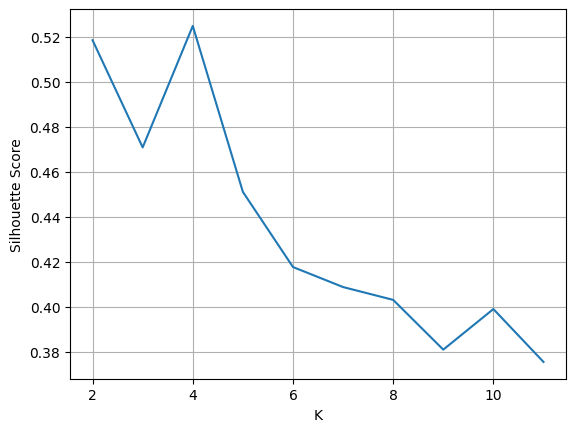

In [61]:
# Finding the Best (K) for K-Means algorithm using Silhouette metric

silhouette_scores = []
k_s = []
for i in range(2,12):
    k_s.append(i)
    k_means = KMeans(n_clusters=i, init="random", n_init='auto', random_state=75).fit(X)
    silhouette_scores.append(silhouette_score(X, k_means.predict(X)))
    print(f"Homogeneity when K={i} : {homogeneity_score(list(correct_labels.values()), k_means.predict(X))}")

k_means = KMeans(n_clusters=(np.argmax(silhouette_scores)+2), n_init='auto', random_state=75).fit(X)
print("_____________________________________")
print(f"Homogeneity when the highest Silhouette (K={np.argmax(silhouette_scores)+2}) happens -> {homogeneity_score(list(correct_labels.values()), k_means.predict(X))}")
plt.plot(k_s,silhouette_scores)
plt.ylabel("Silhouette Score")
plt.xlabel("K")
plt.grid()
plt.plot()

<h4 style=color:yellow> <strong>Suggestions to uplift performance</strong></h4>


- __Different Clustering Algorithms :__ Based on the concept of our data, different clustering algorithms might uplift the performance to some degree. One of the examples is K-DBSCAN which is an extension to DBSCAN that incorporates kernel density estimation to handle data with varying densities.
- __Different Image Processing models :__ Using some of the VGG16 alternatives (such as ResNet or Inception) might leave us with more acurate results. 
- __Larger Training Dataset :__ The reason that our model has lower performance might just be lack of enough and good training data, which we can resolve by either augmentation or simply gathering more data for our training.